In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('../Dataset/data.csv')  # Replace with your file path
print("✅ Data Loaded Successfully")


✅ Data Loaded Successfully


In [13]:
print("\n🔍 First 5 rows of data:")
print(df.head())


🔍 First 5 rows of data:
         diseases  anxiety and nervousness  depression  shortness of breath  \
0  panic disorder                        1           0                    1   
1  panic disorder                        0           0                    1   
2  panic disorder                        1           1                    1   
3  panic disorder                        1           0                    0   
4  panic disorder                        1           1                    0   

   depressive or psychotic symptoms  sharp chest pain  dizziness  insomnia  \
0                                 1                 0          0         0   
1                                 1                 0          1         1   
2                                 1                 0          1         1   
3                                 1                 0          1         1   
4                                 0                 0          0         1   

   abnormal involuntary movemen

In [14]:
print("\n📋 Data Info:")
print(df.info())


📋 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB
None


In [15]:
print("\n❓ Missing Values:")
print(df.isnull().sum())


❓ Missing Values:
diseases                            0
anxiety and nervousness             0
depression                          0
shortness of breath                 0
depressive or psychotic symptoms    0
                                   ..
hip weakness                        0
back swelling                       0
ankle stiffness or tightness        0
ankle weakness                      0
neck weakness                       0
Length: 378, dtype: int64


In [16]:
print("\n📊 Target Variable Distribution:")
# Assuming your target column is named 'disease' or similar
print(df['diseases'].value_counts())  # change 'disease' to your actual target column name


📊 Target Variable Distribution:
diseases
cystitis                          1219
nose disorder                     1218
vulvodynia                        1218
complex regional pain syndrome    1217
spondylosis                       1216
                                  ... 
open wound of the head               1
myocarditis                          1
chronic ulcer                        1
hypergammaglobulinemia               1
kaposi sarcoma                       1
Name: count, Length: 773, dtype: int64


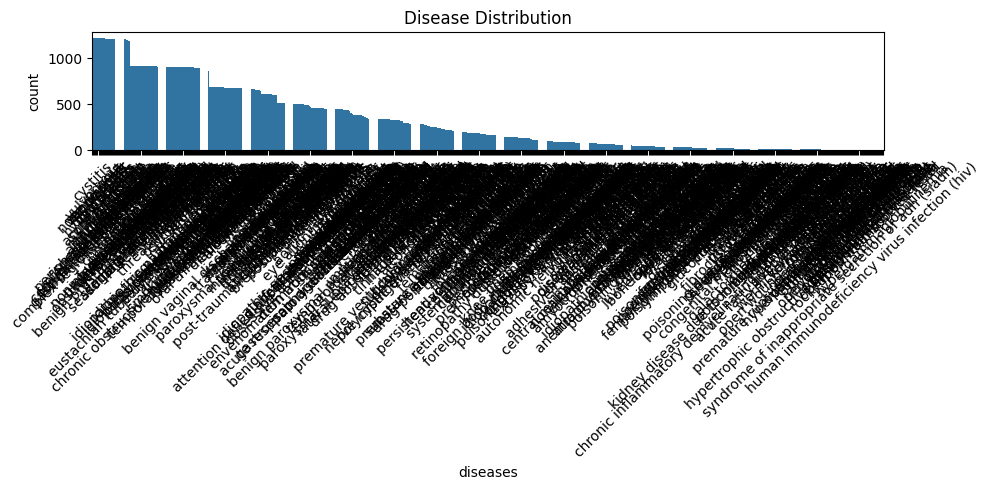

In [17]:
# Plot target distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='diseases', order=df['diseases'].value_counts().index)
plt.title("Disease Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

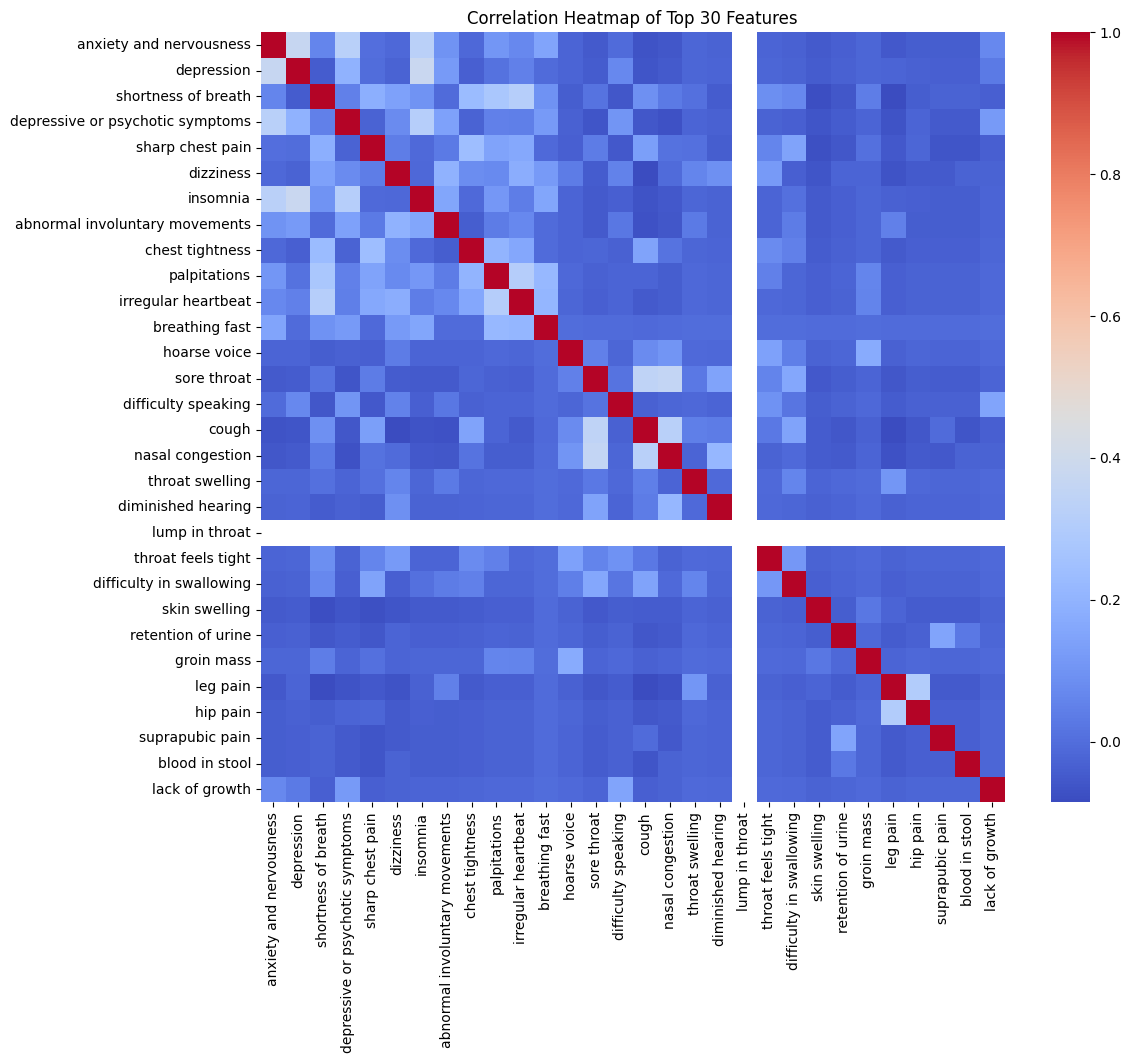

In [18]:
# Optional: sample small part of data to visualize correlation
sample_df = df.sample(1000, random_state=42)
corr = sample_df.drop('diseases', axis=1).corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr.iloc[:30, :30], cmap='coolwarm')  # First 30 features
plt.title("Correlation Heatmap of Top 30 Features")
plt.show()


In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, top_k_accuracy_score
import joblib


class_counts = df['diseases'].value_counts()
valid_classes = class_counts[class_counts > 1].index
filtered_df = df[df['diseases'].isin(valid_classes)]


X = filtered_df.drop('diseases', axis=1)
y = filtered_df['diseases']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("✅ Clean split successful!")
print("🧠 Training samples:", len(X_train))
print("🧪 Testing samples:", len(X_test))


y_train_series = pd.Series(y_train, index=X_train.index)

X_small = X_train.sample(n=75000, random_state=42)
y_small = y_train_series.loc[X_small.index]


rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',  
    random_state=42,
    n_jobs=1
)

print("🚀 Training model...")
rf_model.fit(X_small, y_small)


y_pred = rf_model.predict(X_test)


print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


try:
    y_proba = rf_model.predict_proba(X_test)
    top3_acc = top_k_accuracy_score(y_test, y_proba, k=3)
    print("🌟 Top-3 Accuracy:", round(top3_acc * 100, 2), "%")
except:
    print("⚠️ Top-K accuracy skipped (not supported for some classifier settings)")


joblib.dump(rf_model, 'random_forest_disease_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("💾 Model and label encoder saved!")


✅ Clean split successful!
🧠 Training samples: 197540
🧪 Testing samples: 49386
🚀 Training model...
🎯 Accuracy: 0.8387599724618313

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.96      0.90      0.93        81
           2       0.89      0.86      0.88        58
           3       0.57      1.00      0.73         4
           4       0.88      0.90      0.89        68
           5       0.55      1.00      0.71         6
           6       1.00      0.86      0.92         7
           7       0.74      0.82      0.78        17
           8       0.69      0.75      0.71        99
           9       0.76      0.77      0.77       182
          10       0.94      0.91      0.92       241
          11       0.72      0.77      0.75       243
          12       0.67      0.57      0.62       181
          13       0.67      1.00      0.80         2
          14       0.42      0.38

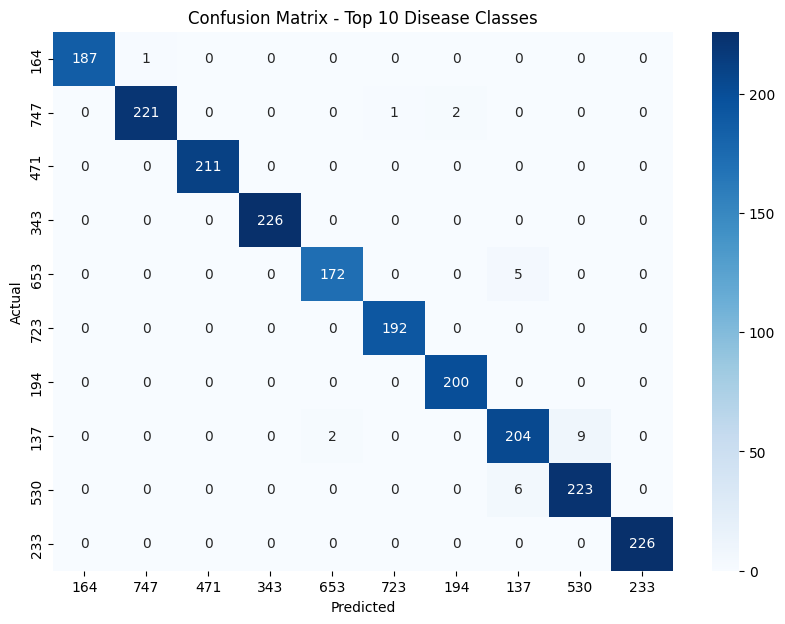

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get top 10 most common classes
top_classes = pd.Series(y_test).value_counts().head(10).index

# Filter predictions and truths to top classes only
mask = [y in top_classes for y in y_test]
y_test_top = [y for y, m in zip(y_test, mask) if m]
y_pred_top = [y for y, m in zip(y_pred, mask) if m]

# Confusion matrix
cm = confusion_matrix(y_test_top, y_pred_top, labels=top_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=top_classes,
            yticklabels=top_classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Top 10 Disease Classes")
plt.show()


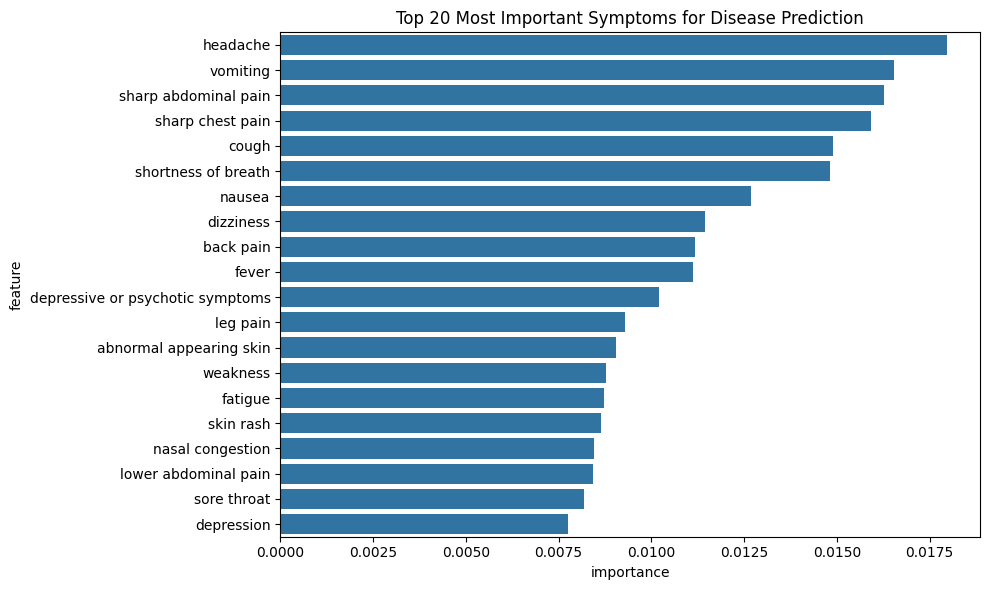

In [27]:
# Feature importance visualization
importances = rf_model.feature_importances_
feature_names = X.columns

feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

top_features = feature_df.sort_values(by='importance', ascending=False).head(20)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_features, x='importance', y='feature')
plt.title("Top 20 Most Important Symptoms for Disease Prediction")
plt.tight_layout()
plt.show()
